# Exploration of airbnb and price per m2 evolution over last years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Airbnb evolution over time

In [14]:
airbnb = pd.read_csv('./data/airbnb_dataset.csv')

In [15]:
columns = ['date', 'district', 'n_hosts', 'n_posts', 'n_latlongs', 'n_total']
elements = []
for i, df in airbnb.groupby(['date','neighbourhood_group']):
    n_total = len(df)
    n_latlongs = len(df.drop_duplicates(subset=['latitude', 'longitude']))
    n_posts = len(df.name.unique())
    n_hosts = len(df.host_id.unique())
    date = i[0]
    district = i[1]
    elements.append([date, district, n_hosts, n_posts, n_latlongs, n_total])
airbnb_results = pd.DataFrame(elements, columns=columns)

In [16]:
airbnb_results['date'] = pd.to_datetime(airbnb_results.date).dt.date

#### 1.1. Calculate ratios

In [45]:
def calculate_ratio_total_vs_hosts(data):
    return airbnb_results['n_total'] / airbnb_results['n_hosts']

def calculate_ratio_reference(data):
    ref_values = data.sort_values(by=['date']).groupby(['district']).first().reset_index().rename(columns={'n_total':'n_total_ref'})
    ref_values = ref_values.loc[:,['district','n_total_ref']]
    data_ = data.merge(ref_values, left_on='district', right_on='district')
    data_['ratio_reference'] = data_['n_total'] / data_['n_total_ref']
    return data_

In [46]:
airbnb_results['ratio_listints_hosts'] = calculate_ratio_total_vs_hosts(airbnb_results)
airbnb_results_ = calculate_ratio_reference(airbnb_results)

###### Evolution of ratio number of listings/number of hosts

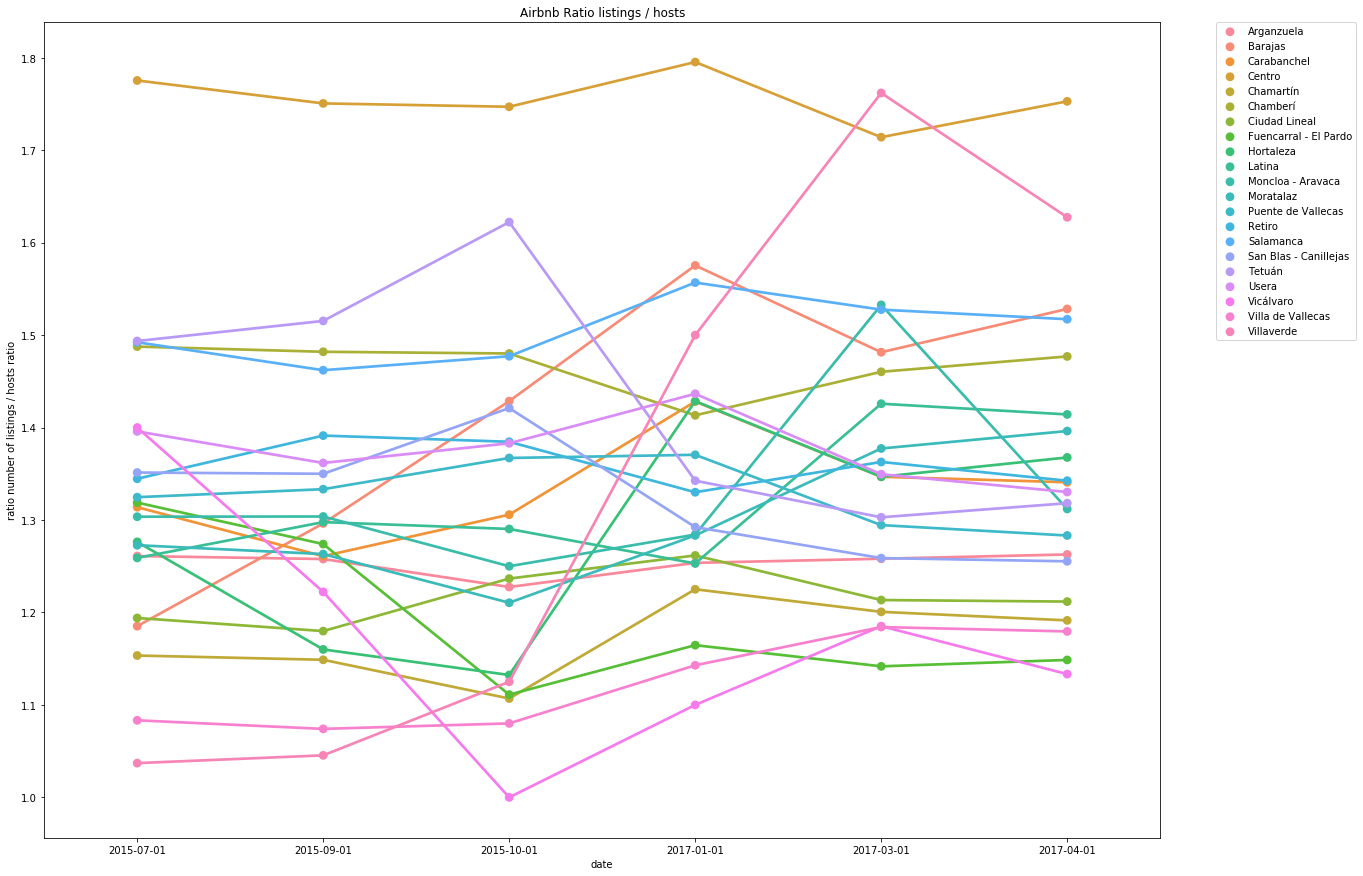

In [61]:
plt.figure(figsize=(20,15))
ax = sns.pointplot(x="date", y="ratio_listints_hosts", hue="district", data=airbnb_results_)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('ratio number of listings / hosts ratio')
ax.set_title('Airbnb Ratio listings / hosts')

Clearly, there are specific districts where one hosts are offering much more than one flat/room which is against the principles of Airbnb politics.

###### Evolution of ratio number of listings/number of listings in 2015

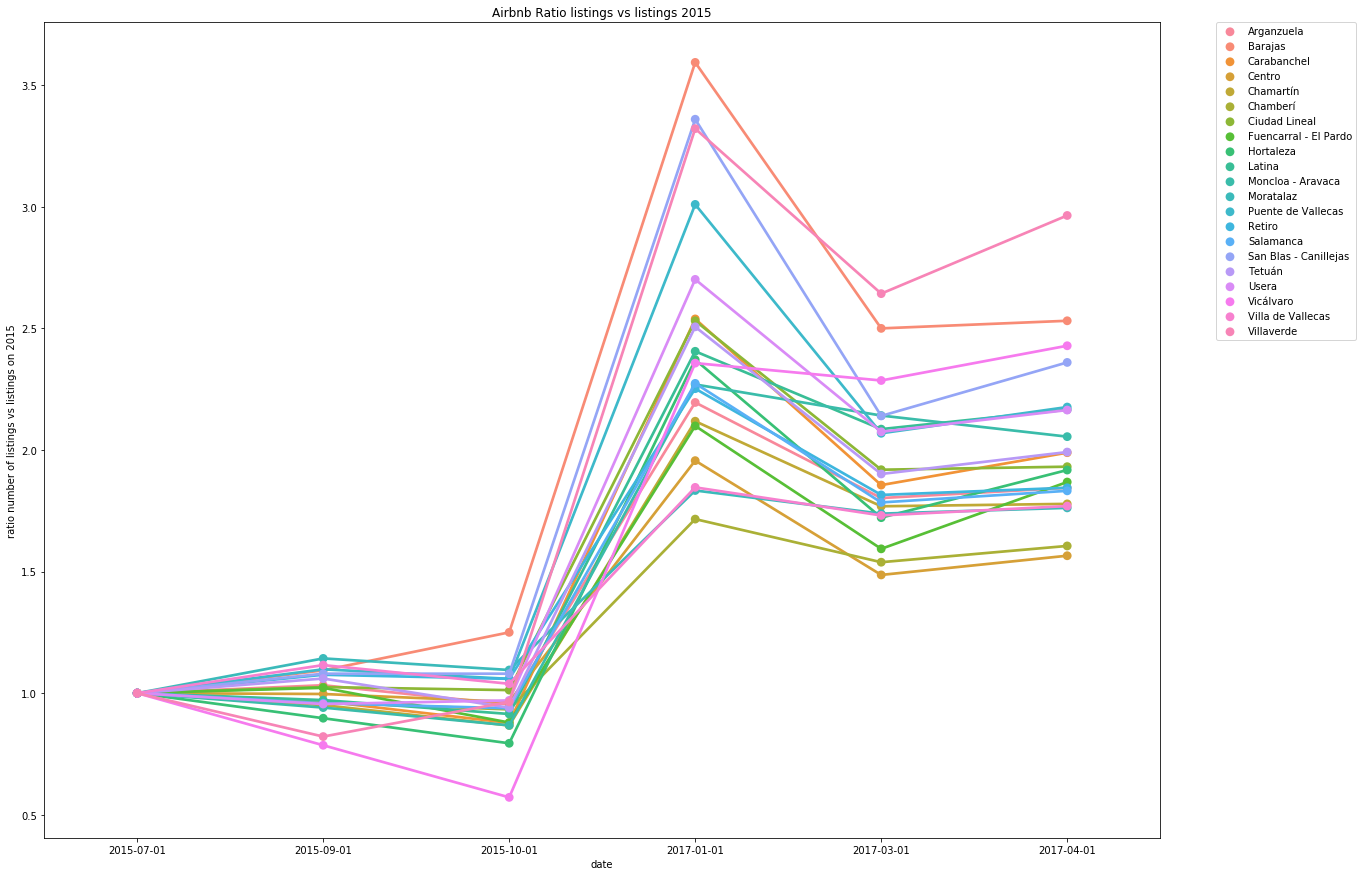

In [62]:
plt.figure(figsize=(20,15))
ax = sns.pointplot(x="date", y="ratio_reference", hue="district", data=airbnb_results_)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('ratio number of listings vs listings on 2015')
ax.set_title('Airbnb Ratio listings vs listings 2015')

The number of listings offered by Airbnb has been increased in 350% in some cases since 2015.

### 2. Rental and Sale prices per m2 evolution over time per district

In [63]:
sale = pd.read_csv('./data/sale_price_m2_districts.csv')
rent = pd.read_csv('./data/rent_price_m2_districts.csv')

# drop vicalvaro since rental data is missing for 2016 and 2017
sale = sale[sale['district'] != 'vicálvaro']
rent = rent[rent['district'] != 'vicálvaro']

sale['price_m2'] = sale['price_m2'].str.split(' ').apply(lambda x: ''.join(x)).str.split('.').apply(lambda x: ''.join(x)).astype(int)
rent['price_m2'] = rent['price_m2'].str.split(' ').apply(lambda x: ''.join(x).replace(',','.')).astype(float)

#### 2.1. Calculate ratios

In [71]:
def calculate_ratio_reference_idealista(data):
    ref_values = data.sort_values(by=['year']).groupby(['district']).first().reset_index().rename(columns={'price_m2':'price_m2_ref'})
    ref_values = ref_values.loc[:,['district','price_m2_ref']]
    data_ = data.merge(ref_values, left_on='district', right_on='district')
    data_['ratio_reference'] = data_['price_m2'] / data_['price_m2_ref']
    return data_

###### Evolution of sales prices per m2 by district since 2007

In [79]:
rent_ = calculate_ratio_reference_idealista(rent)

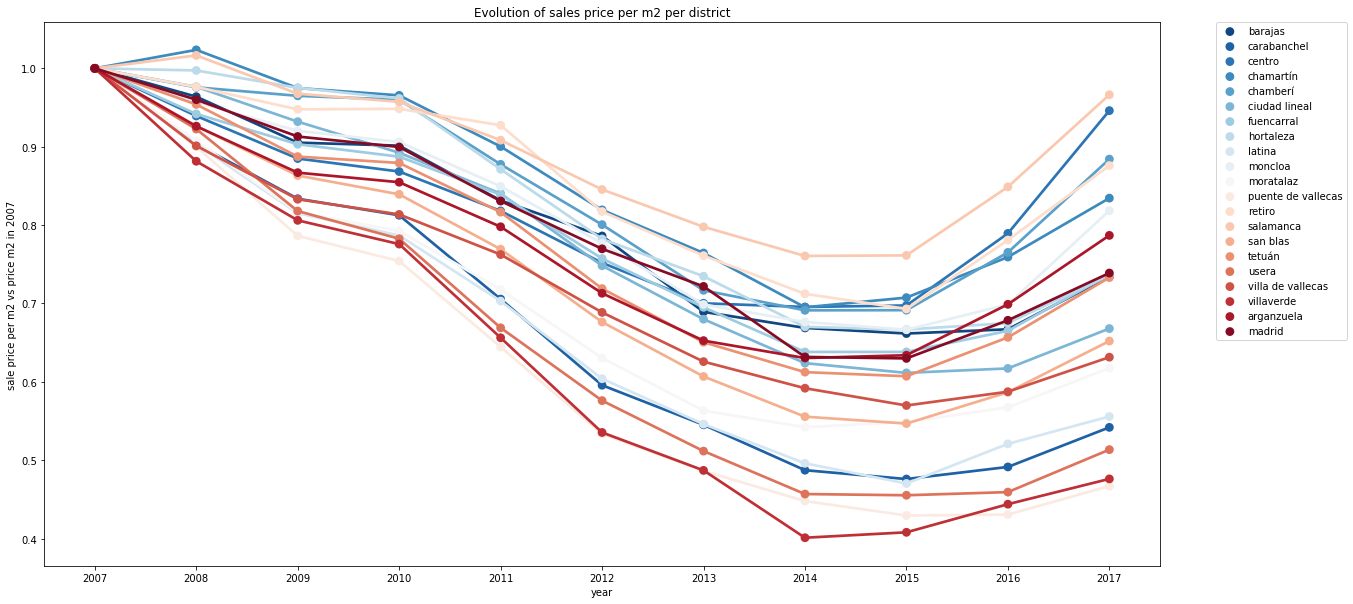

In [80]:
plt.figure(figsize=(20,10))
ax = sns.pointplot(x="year", y="ratio_reference", hue="district", data=sale_, palette="RdBu_r")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('sale price per m2 vs price m2 in 2007')
ax.set_title('Evolution of sales price per m2 per district')

###### Evolution of rental prices per m2 by district since 2007

In [77]:
sale_ = calculate_ratio_reference_idealista(sale)

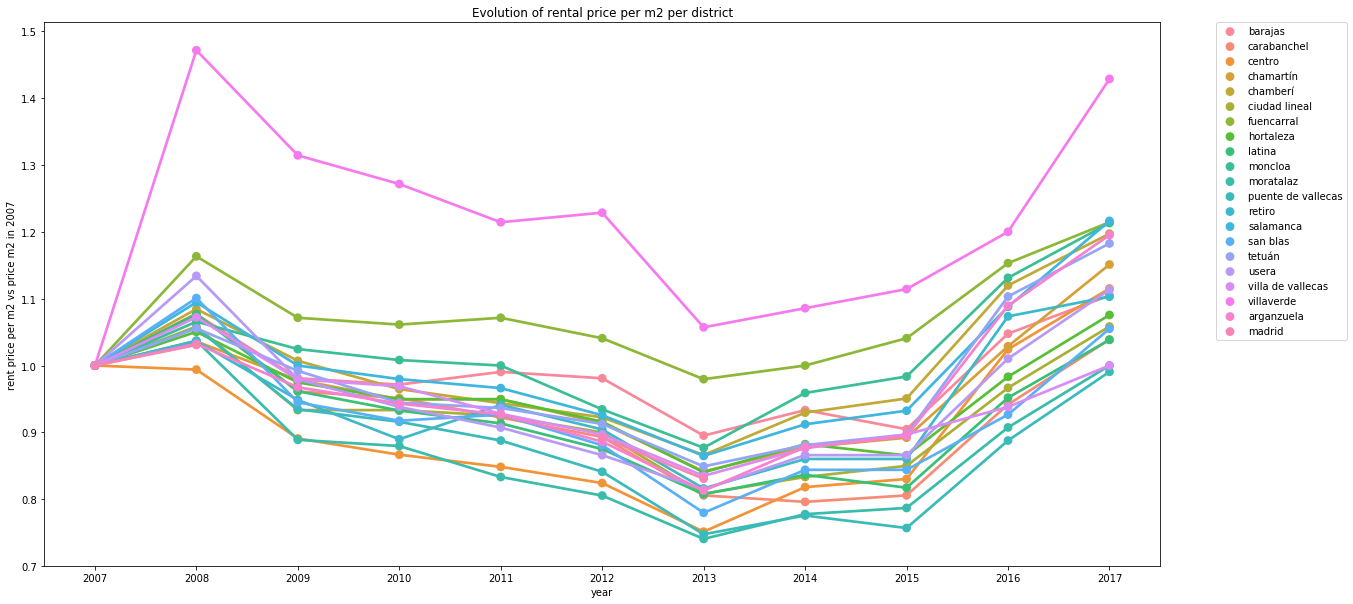

In [78]:
plt.figure(figsize=(20,10))
ax = sns.pointplot(x="year", y="ratio_reference", hue="district", data=rent_)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('rent price per m2 vs price m2 in 2007')
ax.set_title('Evolution of rental price per m2 per district')